Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [2]:
#Loading the csv data to a Pandas Dataframe

In [3]:
df=pd.read_csv("C:/Users/swath/OneDrive/Desktop/sruthi/heart_disease_data.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#Check the number of rows and columns in the dataset

In [7]:
df.shape

(303, 14)

In [8]:
# Getting some information about the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Checking for the missing values

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
#Ststistical Measures about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# Checking the distribution of the target variable
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1--->defective heart
0--->Healthy heart

In [14]:
X=df.drop(columns='target',axis=1)
Y=df['target']

In [15]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [16]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Taking care of Duplicate Values

In [17]:
data_dup = df.duplicated().any()
data_dup

True

In [18]:
df = df.drop_duplicates()

In [19]:
df_dup = df.duplicated().any()
df_dup

False

Data Preprocessing

In [20]:
Categorical_val = []
Numerical_val = []

for column in df.columns:
    if df[column].nunique()<=10:
        Categorical_val.append(column)
    else:
        Numerical_val.append(column)

In [21]:
Categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [22]:
Numerical_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Encoding Categorical Data

In [23]:
Categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [24]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [25]:
Categorical_val.remove('sex')
Categorical_val.remove('target')
df=pd.get_dummies(df,columns=Categorical_val,drop_first=True)

In [26]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


Feature Scaling

In [27]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
st = StandardScaler()
df[Numerical_val] = st.fit_transform(df[Numerical_val])

In [30]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


Splitting the dataset to training and testing dataset

In [31]:
X = df.drop('target',axis=1)
Y = df['target']

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [33]:
#Stratify is used to evenly distribute the two classes 0 and 1 and the random state is to regenerate the data points

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(302, 22) (241, 22) (61, 22)


Model Training

In [35]:
#Logistic Regression Model
model = LogisticRegression()

In [36]:
#TRAINING LOGISTIC REGRESSION MODEL WITH THE TRAINING DATA

In [37]:
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation

In [38]:
#Accuracy Score as evaluation Matrix

In [39]:
#AAccuracy on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [40]:
print('Accuracy on Training Data : ',training_data_accuracy)

Accuracy on Training Data :  0.8713692946058091


In [41]:
#Accuracy on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy on Testing Data : ',test_data_accuracy)

Accuracy on Testing Data :  0.8360655737704918


SUPPORT VECTOR CLASSIFIER

In [43]:
from sklearn import svm

In [44]:
svm = svm.SVC()

In [45]:
svm.fit(X_train,Y_train)

SVC()

In [46]:
y_pred2 = svm.predict(X_test)

In [47]:
accuracy_score(Y_test,y_pred2)

0.7868852459016393

K Nearest Neighbours Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [51]:
y_pred3 = knn.predict(X_test)

In [52]:
accuracy_score(Y_test,y_pred3)

0.7704918032786885

In [53]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(Y_test,y_pred))



In [54]:
score

[0.6721311475409836,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885]

In [55]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
accuracy_score(Y_test,y_pred)


0.7540983606557377

In [56]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,Y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

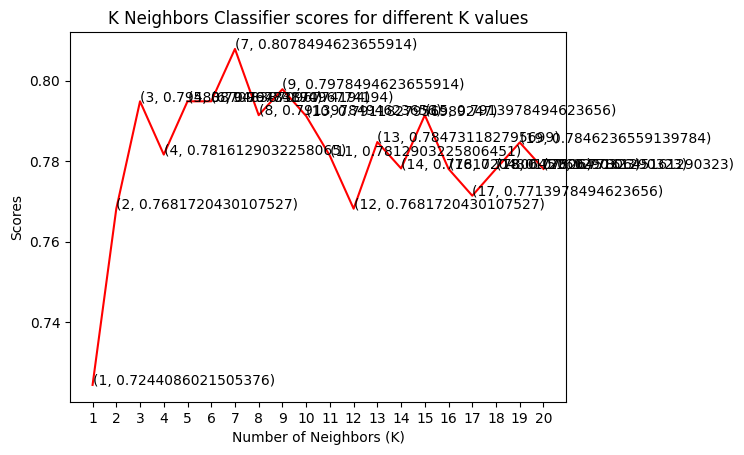

In [57]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [108]:
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
score=cross_val_score(knn_classifier,X,Y,cv=10)

In [109]:
score.mean()

0.8078494623655914

Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = DecisionTreeClassifier()

In [62]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [63]:
y_pred4 = dt.predict(X_test)

In [64]:
accuracy_score(Y_test,y_pred4)

0.7868852459016393

Random Forest Classifier

In [65]:
rf = RandomForestClassifier()

In [66]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [67]:
y_pred5 = rf.predict(X_test)

In [68]:
accuracy_score(Y_test,y_pred5)

0.7540983606557377

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [70]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [71]:
y_pred6 = gbc.predict(X_test)

In [72]:
accuracy_score(Y_test,y_pred6)

0.7540983606557377

In [110]:
final_data = pd.DataFrame({'Models':['Logistic_Regression','SVM','KNN','DT','RF','GB'],
  'Accuracy':[accuracy_score(Y_test,X_test_prediction),
              accuracy_score(Y_test,y_pred2),
              accuracy_score(Y_test,y_pred3),
              accuracy_score(Y_test,y_pred4),
              accuracy_score(Y_test,y_pred5),
              accuracy_score(Y_test,y_pred6),]})

In [111]:
final_data

,Models,Accuracy
0,Logistic_Regression,0.836066
1,SVM,0.786885
2,KNN,0.770492
3,DT,0.786885
4,RF,0.754098
5,GB,0.754098


Logistic_Regression gives the best Accuracy therefore we shall train the random forest classifier on our entire dataset

Visualizations using Correlation Matrix

<Axes: >

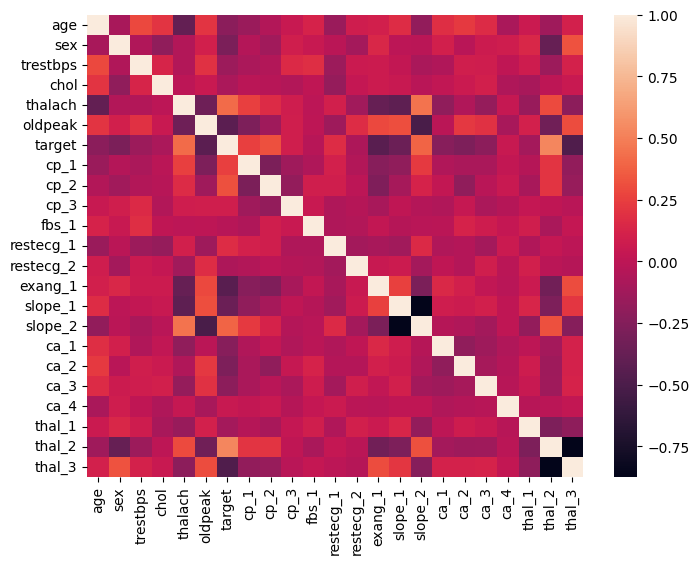

In [78]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

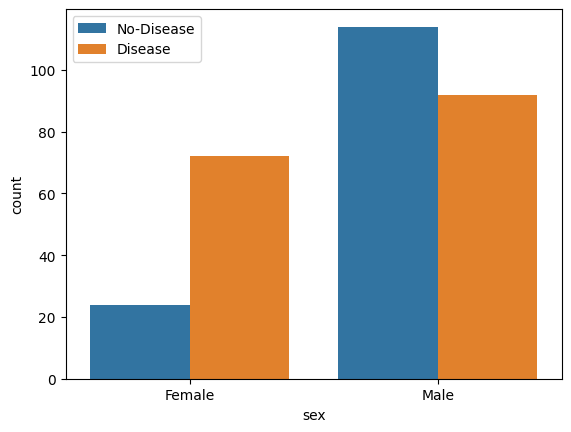

In [83]:
sns.countplot(x='sex',hue='target',data=df)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])

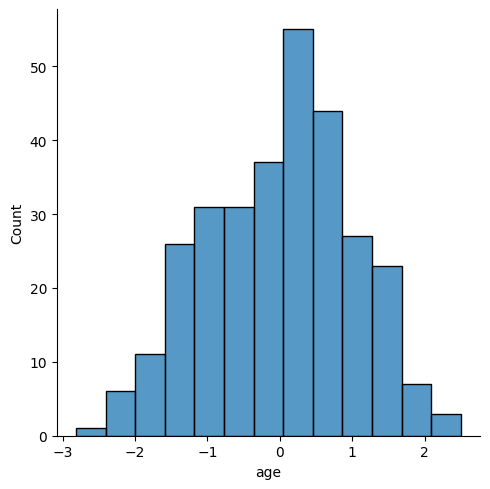

In [86]:
sns.displot(df['age'])
plt.show()

Showing Fasstest Blood Sugar Distribution According to the Target Variable

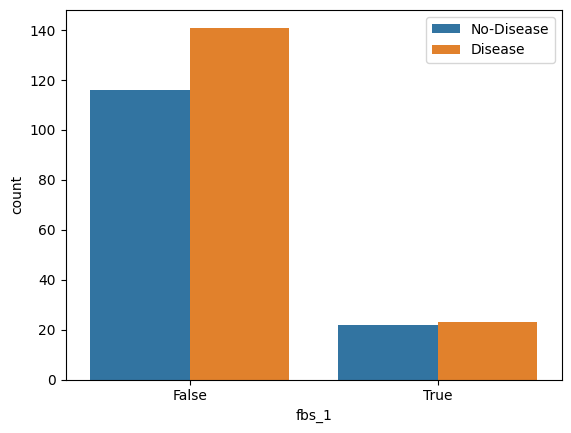

In [91]:
sns.countplot(x="fbs_1",hue="target",data=df)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

Checking resting blood pressure distribution

<Axes: >

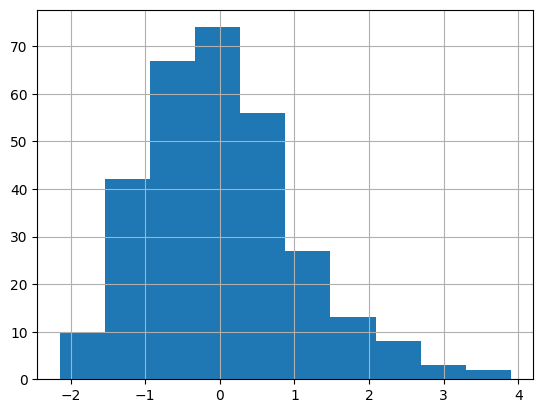

In [92]:
df['trestbps'].hist()

Compare Resting Blood Pressure As per Sex Column

c:\Users\swath\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\swath\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


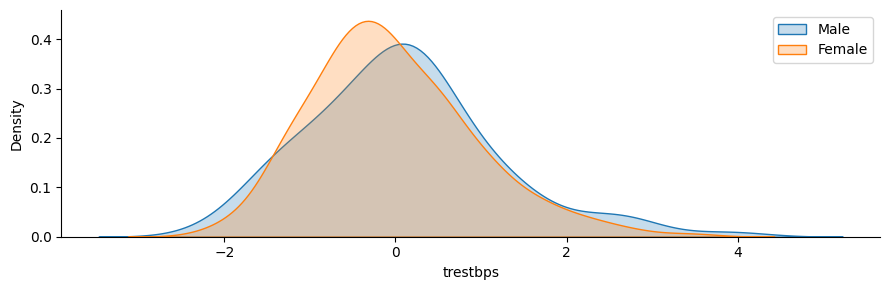

In [103]:
g = sns.FacetGrid(df,hue="sex",aspect=3)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=["Male","Female"])

Distribution of Serum Cholesterol

<Axes: >

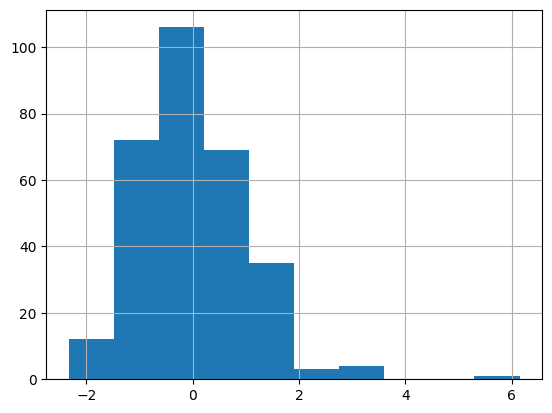

In [104]:
df['chol'].hist()

distance plot to check how accurate our predicted value is.
all the values lies between -1 and +1, that is the diff between the prediction and the test doesn't have much variance.

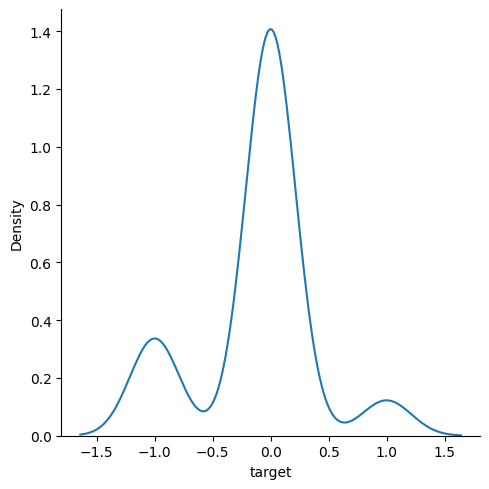

In [105]:
import seaborn as sns
sns.displot(y_pred-Y_test,kind='kde')